In [39]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
#import hipp
from history.dataquery import HistoryDataset, download_casa_grande_kh9pc_metadata
from history.preproc_kh9pc import clicking_on_corner
import history
import os
import cv2
import matplotlib.pyplot as plt

In [25]:
# Parameters

PROJECT_DIRECTORY = "/home/godinlu/Documents/history-dataset-v2/casa_grande/kh9pc/1978_03_25"
RAW_IMAGES = os.path.join(PROJECT_DIRECTORY, "raw_images")
JOINED_IMAGES = os.path.join(PROJECT_DIRECTORY, "joined_images")
PREPROCESSED_IMAGES = os.path.join(PROJECT_DIRECTORY, "preprocessed_images")
CSV_FILE = os.path.join(PROJECT_DIRECTORY, "cropping_borders.csv")

In [42]:
print(history.dataquery.get_casa_grande_kh9pc_ids())

['D3C1214-100097A013', 'D3C1214-100097A014', 'D3C1214-100097A015', 'D3C1214-100097F012', 'D3C1214-100097F013', 'D3C1214-100097F014']


In [37]:
download_casa_grande_kh9pc_metadata("./salut/")

## 2) Manually Select the Corners for Cropping

In this second step, we call the `clicking_on_corner` function, which allows the user to manually click on the four corners of each previously joined images.

The selected coordinates are saved to a JSON file for later use. These corner points will be essential for the next step, where we perform the cropping of the image based on the manually defined boundaries.


In [31]:
clicking_on_corner(JOINED_IMAGES, CSV_FILE)

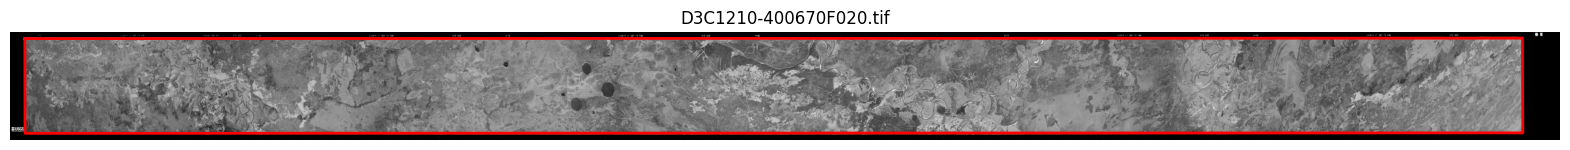

In [33]:
import json
import cv2
import numpy as np

image_name = "D3C1210-400670F020.tif"

with open(JSON_FILE) as file:
    data = json.load(file)
coordinates = data[image_name]

# Créer une liste des points dans l'ordre
pts =  list(coordinates.values()) + [coordinates['top_left']]
pts = np.array(pts) * 0.05

quickview_image = cv2.imread(os.path.join(JOINED_IMAGES, "quickviews", image_name.replace(".tif", ".jpg")), cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(20, 8))
plt.imshow(quickview_image, cmap="gray")
plt.plot(pts[:, 0], pts[:, 1], color='red', linewidth=2) 
plt.axis("off")
plt.title(f"{image_name}")
plt.show()